# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
pd.set_option('display.max_rows', 500)


# Read data

In [2]:
df = pd.read_csv("motor_data14-2018.csv")

df["INSR_TYPE"].value_counts()
df[df["CARRYING_CAPACITY"].isna()]
df[df["CARRYING_CAPACITY"].isna()]
df["CARRYING_CAPACITY"].value_counts()

df["MAKE"].value_counts()[df["MAKE"].value_counts() > 500].keys()

df = df[df["SEX"] != 2]
df = df[~df["CARRYING_CAPACITY"].isna()]
df = df[df["MAKE"].isin(df["MAKE"].value_counts()[df["MAKE"].value_counts() > 500].keys())]
df[~df["INSURED_VALUE"].isna()]
df = df.sample(100000, random_state=42)
df = df.reset_index(drop=True)

# input
X = df.drop(["EFFECTIVE_YR",'INSR_BEGIN','INSR_END','OBJECT_ID','CLAIM_PAID'], axis=1)

# y
y = df['CLAIM_PAID']
y = y.fillna(0)
y = (y>0).astype('int')

X = X.fillna(0)

assert X.isna().sum().sum() == 0

C:\Users\achot\AppData\Local\Temp\ipykernel_16056\680871077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X, x="SEX", palette=color_palette)


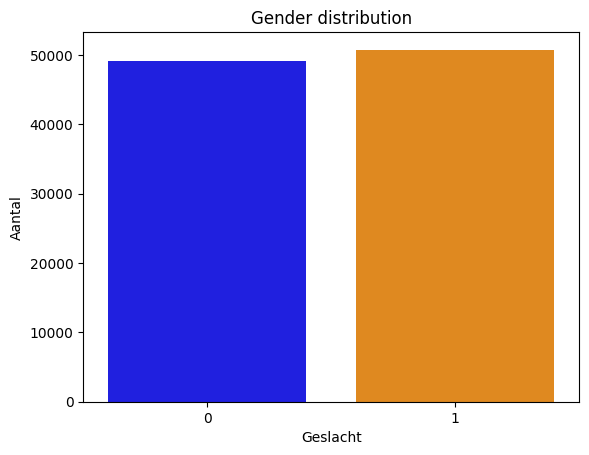

Aantal mensen in groep 0 (bijvoorbeeld man): 49222
Aantal mensen in groep 1 (bijvoorbeeld vrouw): 50778


In [3]:
donker_oranje = '#FF8C00'

color_palette = {'0': 'blue', '1': donker_oranje}
X['SEX'] = X['SEX'].astype(str)
sns.countplot(data=X, x="SEX", palette=color_palette)
plt.title("Gender distribution")
plt.xlabel("Geslacht")
plt.ylabel("Aantal")
plt.show()

aantal_per_geslacht = X['SEX'].value_counts()


print("Aantal mensen in groep 0 (bijvoorbeeld man):", aantal_per_geslacht['0'])
print("Aantal mensen in groep 1 (bijvoorbeeld vrouw):", aantal_per_geslacht['1'])


In [4]:
df_claim_sex = pd.DataFrame({'CLAIM_PAID': y, 'SEX': df['SEX']})

aantal_claim_paid_per_groep = df_claim_sex[df_claim_sex['CLAIM_PAID'] == 1].groupby('SEX').size()

print("Aantal mensen met CLAIM_PAID gelijk aan 1 per groep:")
print(aantal_claim_paid_per_groep)


Aantal mensen met CLAIM_PAID gelijk aan 1 per groep:
SEX
0    4727
1    2814
dtype: int64


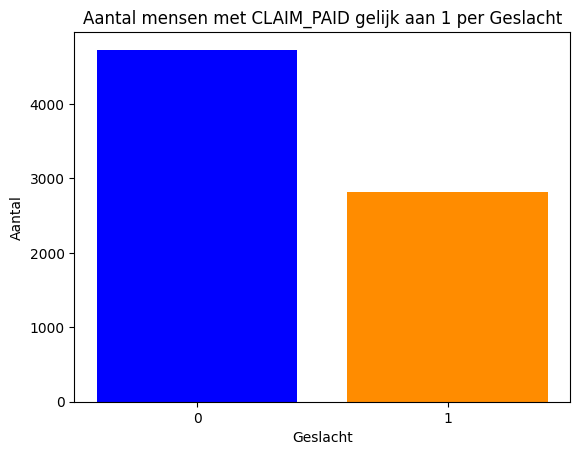

In [5]:
import matplotlib.pyplot as plt
donker_oranje = '#FF8C00'

aantal_claim_paid_per_geslacht = df_claim_sex[df_claim_sex['CLAIM_PAID'] == 1].groupby('SEX').size()

plt.bar(aantal_claim_paid_per_geslacht.index, aantal_claim_paid_per_geslacht, color=['blue', donker_oranje])

plt.xlabel('Geslacht')
plt.ylabel('Aantal')
plt.title('Aantal mensen met CLAIM_PAID gelijk aan 1 per Geslacht')

plt.xticks(aantal_claim_paid_per_geslacht.index, ['0', '1'])

plt.show()


In [6]:
top_10 = df['TYPE_VEHICLE'].value_counts().head(10)
print(top_10)

Pick-up                      24784
Truck                        24387
Motor-cycle                  22071
Bus                          16008
Trailers and semitrailers     4991
Automobile                    1741
Tanker                        1732
Special construction          1484
Station Wagones               1479
Tractor                       1323
Name: TYPE_VEHICLE, dtype: int64


In [7]:
distribution = df.groupby(['TYPE_VEHICLE', 'SEX']).size().unstack(fill_value=0)
print(distribution)

SEX                            0      1
TYPE_VEHICLE                           
Automobile                   286   1455
Bus                         6689   9319
Motor-cycle                 2384  19687
Pick-up                    21101   3683
Special construction        1379    105
Station Wagones             1270    209
Tanker                      1550    182
Tractor                     1137    186
Trailers and semitrailers   2850   2141
Truck                      10576  13811


In [8]:
motor_cycle_data = df[df['TYPE_VEHICLE'] == 'Motor-cycle']

distribution = motor_cycle_data.groupby('SEX')['CLAIM_PAID'].count()
print("Verdeling van CLAIM_PAID voor geslacht 0 en 1 bij het voertuigtype 'Motor-cycle':")
print(distribution)

Verdeling van CLAIM_PAID voor geslacht 0 en 1 bij het voertuigtype 'Motor-cycle':
SEX
0      5
1    107
Name: CLAIM_PAID, dtype: int64


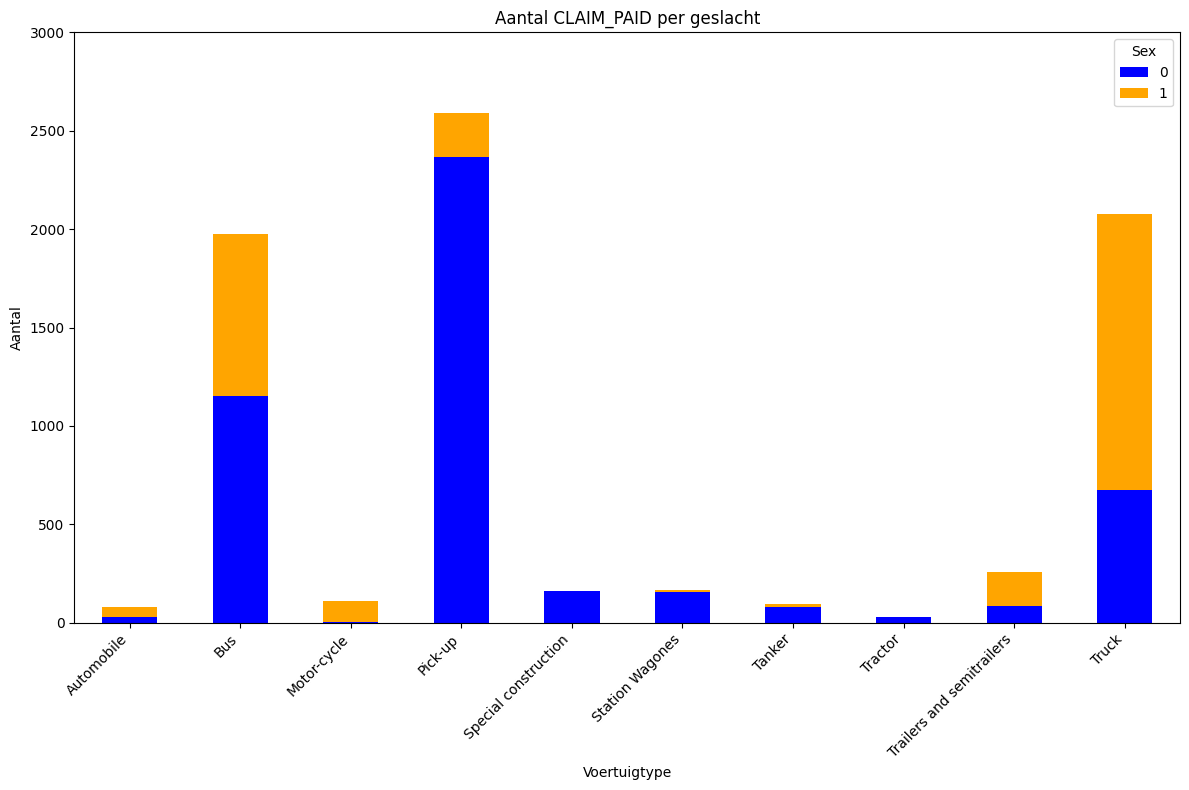

In [9]:
grouped = df.groupby(['TYPE_VEHICLE', 'SEX'])['CLAIM_PAID'].count().unstack()

fig, ax = plt.subplots(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'orange'])

ax.set_xlabel('Voertuigtype')
ax.set_ylabel('Aantal')
ax.set_title('Aantal CLAIM_PAID per geslacht')
ax.legend(title='Sex', labels=['0', '1'])

max_claims = grouped.sum(axis=1).max()
ax.set_ylim(0, (max_claims // 500 + 1) * 500)
ax.set_yticks(range(0, (max_claims // 500 + 2) * 500, 500))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
X

,SEX,INSR_TYPE,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE
0,0,1202,1525208.64,15610.79,2015.0,2.0,70.0,Truck,7790.0,ISUZU,Own Goods
1,0,1202,1942014.48,16928.86,2012.0,1.0,0.0,Tractor,0.0,BELARUS,Agricultural Own Farm
2,1,1202,0.00,461.37,2014.0,3.0,0.0,Motor-cycle,173.3,BAJAJI,Taxi
3,1,1202,0.00,726.10,1987.0,4.0,7.0,Pick-up,1998.0,TOYOTA,Own Goods
4,1,1202,0.00,755.00,2009.0,5.0,6.0,Bus,2494.0,TOYOTA,Own service
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1202,248834.00,4138.65,2000.0,0.0,200.0,Trailers and semitrailers,0.0,CALABRESE,Own Goods
99996,1,1201,0.00,1105.60,2013.0,4.0,6.0,Pick-up,2194.0,MAZDA,Own Goods
99997,0,1202,0.00,1214.72,2012.0,8.0,0.0,Special construction,4164.0,INTERNATIONAL USE,Own service
99998,1,1202,1300000.00,12589.24,2014.0,2.0,0.0,Truck,8226.0,ISUZU,General Cartage


## One hot encoding

In [11]:
# categorische features
categorical_columns = ["SEX","INSR_TYPE","TYPE_VEHICLE","MAKE","USAGE"]
print(f"De categorische kolommen zijn: {categorical_columns}")
categorical_transformer = OneHotEncoder(drop='first')

X_categorical = categorical_transformer.fit_transform(X[categorical_columns])
print(f"X: one hot encoding finished")

X_categorical_pd = pd.DataFrame(X_categorical.toarray(), columns=categorical_transformer.get_feature_names_out(categorical_columns))



De categorische kolommen zijn: ['SEX', 'INSR_TYPE', 'TYPE_VEHICLE', 'MAKE', 'USAGE']
X: one hot encoding finished


In [12]:
X = X.drop(categorical_columns, axis=1)

In [13]:
X = pd.concat([X, X_categorical_pd], axis=1)

# Corremover

In [14]:
col_names = list(X.columns)
col_names.remove("SEX_1")

In [15]:
# CORRELATIONS tussen FEATURES voor de REMOVER uitgevoerd werd
X.corr().head()

,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,SEX_1,INSR_TYPE_1202,INSR_TYPE_1204,TYPE_VEHICLE_Bus,...,USAGE_Fare Paying Passengers,USAGE_Fire fighting,USAGE_General Cartage,USAGE_Learnes,USAGE_Others,USAGE_Own Goods,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi
INSURED_VALUE,1.000000,0.715775,0.254419,0.101430,0.111360,0.356676,-0.260203,0.016044,-0.004800,-0.007178,...,-0.240408,0.026197,0.128770,-0.043349,-0.081171,0.149051,0.042270,-0.031967,0.094082,-0.168787
PREMIUM,0.715775,1.000000,0.182725,0.162492,0.105134,0.447883,-0.080890,0.030274,-0.005399,0.124984,...,-0.146757,0.024912,0.316455,-0.037315,-0.090346,-0.048487,0.045494,-0.046379,0.012499,-0.173597
PROD_YEAR,0.254419,0.182725,1.000000,-0.036744,-0.005771,-0.086904,0.063491,0.046006,-0.004913,-0.137480,...,0.125603,0.000297,0.028299,-0.041090,0.071003,-0.111927,0.054803,-0.015133,0.009647,-0.131621
SEATS_NUM,0.101430,0.162492,-0.036744,1.000000,-0.033779,0.091884,-0.109263,0.018806,-0.002412,0.611609,...,0.292049,-0.002371,-0.167990,0.020773,-0.030624,-0.188875,0.216262,-0.026956,-0.029888,-0.031619
CARRYING_CAPACITY,0.111360,0.105134,-0.005771,-0.033779,1.000000,0.130719,-0.083175,0.013635,-0.001153,-0.052333,...,-0.064809,0.002293,0.060805,-0.008611,-0.016842,0.060318,-0.039574,-0.015344,0.005377,-0.033943


In [16]:
#Wwelke variabelen hebben een sterke correlatie met het geslacht?
correlation_with_sex1 = X.corr()['SEX_1'].abs().sort_values(ascending=False)

print(correlation_with_sex1)

SEX_1                                     1.000000
USAGE_Own Goods                           0.624108
USAGE_Fare Paying Passengers              0.436366
TYPE_VEHICLE_Pick-up                      0.412402
TYPE_VEHICLE_Motor-cycle                  0.408985
MAKE_BAJAJI                               0.399403
USAGE_General Cartage                     0.330334
INSURED_VALUE                             0.260203
USAGE_Taxi                                0.253513
MAKE_ISUZU                                0.240053
USAGE_Own service                         0.218889
MAKE_TOYOTA                               0.178214
MAKE_NISSAN                               0.176364
MAKE_BISHOFTU                             0.166030
CCM_TON                                   0.149323
MAKE_MITSUBISHI                           0.131928
MAKE_ORAL                                 0.117410
USAGE_Others                              0.114991
SEATS_NUM                                 0.109263
TYPE_VEHICLE_Special constructi

In [17]:
from fairlearn.preprocessing import CorrelationRemover
cr = CorrelationRemover(sensitive_feature_ids=["SEX_1"])
X_cr = cr.fit_transform(X)

In [18]:
X_cr = pd.DataFrame(X_cr, columns=col_names)
X_cr["SEX_1"] = X["SEX_1"]
X_cr

,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,INSR_TYPE_1202,INSR_TYPE_1204,TYPE_VEHICLE_Bus,TYPE_VEHICLE_Motor-cycle,...,USAGE_Fire fighting,USAGE_General Cartage,USAGE_Learnes,USAGE_Others,USAGE_Own Goods,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi,SEX_1
0,1.286220e+06,14657.042864,2015.586195,0.216614,-193.662893,7223.839017,1.009459,-0.000052,0.024185,0.172276,...,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671,0.0
1,1.703025e+06,15975.112864,2012.586195,-0.783386,-263.662893,-566.160983,1.009459,-0.000052,0.024185,0.172276,...,-0.000062,0.134072,0.001375,0.014816,-0.304944,-0.062371,-0.007426,-0.006186,0.062671,0.0
2,2.316657e+05,1385.891280,2013.431768,4.728738,255.583420,722.112003,0.990830,0.000051,-0.023444,0.833003,...,0.000060,-0.129964,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,0.939249,1.0
3,2.316657e+05,1650.621280,1986.431768,5.728738,262.583420,2546.812003,0.990830,0.000051,-0.023444,-0.166997,...,0.000060,-0.129964,-0.001333,-0.014362,1.295600,0.060459,0.007198,0.005996,-0.060751,1.0
4,2.316657e+05,1679.521280,2008.431768,6.728738,261.583420,3042.812003,0.990830,0.000051,0.976556,-0.166997,...,0.000060,-0.129964,-0.001333,-0.014362,0.295600,1.060459,0.007198,0.005996,-0.060751,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.844945e+03,3184.902864,2000.586195,-1.783386,-63.662893,-566.160983,1.009459,-0.000052,0.024185,0.172276,...,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671,0.0
99996,2.316657e+05,2030.121280,2012.431768,5.728738,261.583420,2742.812003,-0.009170,0.000051,-0.023444,-0.166997,...,0.000060,-0.129964,-0.001333,-0.014362,1.295600,0.060459,0.007198,0.005996,-0.060751,1.0
99997,-2.389891e+05,260.972864,2012.586195,6.216614,-263.662893,3597.839017,1.009459,-0.000052,0.024185,0.172276,...,-0.000062,0.134072,0.001375,0.014816,-0.304944,0.937629,-0.007426,-0.006186,0.062671,0.0
99998,1.531666e+06,13513.761280,2013.431768,3.728738,255.583420,8774.812003,0.990830,0.000051,-0.023444,-0.166997,...,0.000060,0.870036,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,-0.060751,1.0


In [19]:
# CORRELATIONS tussen FEATURES na de REMOVER
X_cr.corr().head()

,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,INSR_TYPE_1202,INSR_TYPE_1204,TYPE_VEHICLE_Bus,TYPE_VEHICLE_Motor-cycle,...,USAGE_Fire fighting,USAGE_General Cartage,USAGE_Learnes,USAGE_Others,USAGE_Own Goods,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi,SEX_1
INSURED_VALUE,1.000000,0.721877,0.281173,0.076058,0.093241,0.332892,0.035848,-0.006431,0.010087,-0.270307,...,0.025012,0.235611,-0.039695,-0.053433,-0.017687,-0.015587,-0.047051,0.078841,-0.110087,-9.969355e-14
PREMIUM,0.721877,1.000000,0.188860,0.155087,0.099073,0.442195,0.036229,-0.005857,0.130942,-0.376044,...,0.024356,0.364782,-0.035876,-0.081854,-0.127085,0.028573,-0.050779,0.006898,-0.158781,-3.004224e-14
PROD_YEAR,0.281173,0.188860,1.000000,-0.030047,-0.000492,-0.078459,0.041686,-0.004578,-0.142189,0.323505,...,0.000798,0.007777,-0.042410,0.064257,-0.092723,0.070550,-0.011903,0.014137,-0.153014,2.726239e-14
SEATS_NUM,0.076058,0.155087,-0.030047,1.000000,-0.043275,0.076886,0.026794,-0.003022,0.623748,-0.100090,...,-0.003250,-0.140582,0.023026,-0.018290,-0.330991,0.198313,-0.032824,-0.037823,-0.004076,-4.022888e-14
CARRYING_CAPACITY,0.093241,0.099073,-0.000492,-0.043275,1.000000,0.120056,0.019660,-0.001609,-0.047194,-0.038917,...,0.001644,0.093856,-0.007030,-0.007352,0.010798,-0.059423,-0.019723,-0.000424,-0.013338,-3.090579e-14


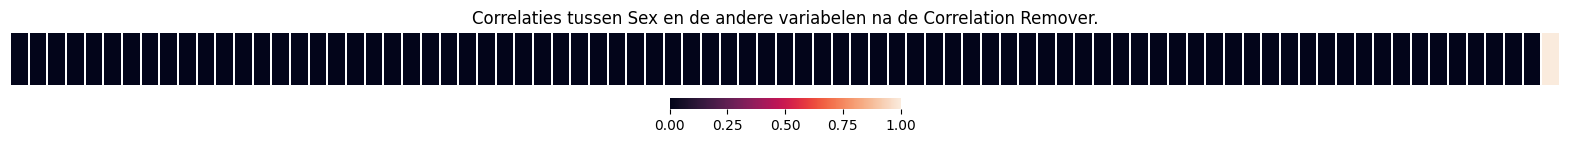

In [20]:
plt.figure(figsize=(20, 1))
sns.heatmap(X_cr.corr()[X_cr.corr().index == "SEX_1"], annot=False, linewidths=.1, cbar_kws={"orientation": "horizontal"}).set_title("Correlaties tussen Sex en de andere variabelen na de Correlation Remover.")
plt.xticks([])  
plt.yticks([])  
plt.savefig('x_cr_corr.png', bbox_inches='tight', dpi=300)  
plt.show()


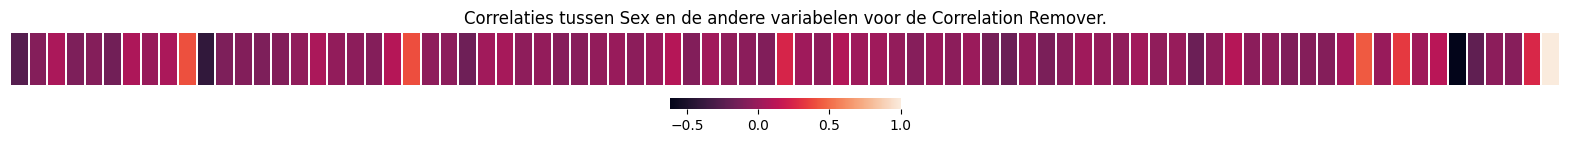

In [21]:
plt.figure(figsize=(20, 1))
sns.heatmap(X[X_cr.columns].corr()[X[X_cr.columns].corr().index == "SEX_1"], annot=False, linewidths=.1, cbar_kws={"orientation": "horizontal"}).set_title("Correlaties tussen Sex en de andere variabelen voor de Correlation Remover.")
plt.xticks([])  
plt.yticks([])  
plt.savefig('x_corr.png', bbox_inches='tight', dpi=300)  
plt.show()


# train test split 

## standardscaler

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_test {y_test.shape}")

# numerieke features
numerical_columns = ["INSURED_VALUE","PREMIUM","PROD_YEAR","SEATS_NUM","CARRYING_CAPACITY","CCM_TON"]
print(f"De numerieke kolommen zijn: {numerical_columns}")

# Aanmaken van transformers voor numerieke en categorische features
numerical_transformer = StandardScaler()

# Toepassen van transformers op the respective columns
X_train_numerical = pd.DataFrame(numerical_transformer.fit_transform(X_train[numerical_columns]), columns=numerical_columns)

print(f"X train: numericals zijn gescaled")

X_train_categorical = X_train.drop(columns=numerical_columns)

X_train_categorical = X_train_categorical.reset_index(drop=True)

# Concatenate the transformed features

X_train_transformed = pd.concat([X_train_numerical, X_train_categorical],axis=1)

Shape of X_train (80000, 83)
Shape of y_train (80000,)
Shape of X_test (20000, 83)
Shape of y_test (20000,)
De numerieke kolommen zijn: ['INSURED_VALUE', 'PREMIUM', 'PROD_YEAR', 'SEATS_NUM', 'CARRYING_CAPACITY', 'CCM_TON']
X train: numericals zijn gescaled


In [23]:
# Toepassen van transformers to the respective columns
X_test_numerical = pd.DataFrame(numerical_transformer.fit_transform(X_test[numerical_columns]), columns=numerical_columns)
X_test_numerical = X_test_numerical.reset_index()
print(f"X test: numericals zijn gescaled")

X_test_categorical = X_test.drop(columns=numerical_columns)
X_test_categorical = X_test_categorical.reset_index(drop=True)

# Concatenate the transformed features
X_test_transformed = pd.concat([X_test_numerical, X_test_categorical],axis=1)
X_test_transformed = X_test_transformed.drop(["index"],axis=1)
X_test_transformed

y_train = y_train.reset_index()["CLAIM_PAID"] #reset index because the X variables were reset by doing the transformations
y_test = y_test.reset_index()["CLAIM_PAID"]

X test: numericals zijn gescaled


# AWARE MODEL

In [24]:
# Trainen van  logistic regression model
model = LogisticRegression(class_weight='balanced', random_state = 42)
model.fit(X_train_transformed, y_train)

# Make predictions on the test set
# y_probs zijn "kansen" tussen 0 en 1
y_probs_train = model.predict_proba(X_train_transformed)[:, 1] 
# als de kansen > 0.50 (standaard treshold), dan is de predictie 1
y_pred_train = model.predict(X_train_transformed) #treshold on 0.50

C:\Users\achot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# We kunnen het model evalueren door de AUC te berkekenen op de train set
auc_train = roc_auc_score(y_train, y_probs_train)
print(f"AUC op train set: {auc_train}")

AUC op train set: 0.771961311717938


In [26]:
y_probs_test = model.predict_proba(X_test_transformed)[:, 1] 

# We kunnen het model evalueren door de AUC te berkekenen op de test set
auc_test = roc_auc_score(y_test, y_probs_test)
print(f"AUC op test set: {auc_test}")

AUC op test set: 0.7661035619310267


In [27]:
# We gaan de de treshold van 0.50 aanpassen zodat we de F1-score kunnen optimaliseren, hetgeen is wenselijk voor de verzekaar

# Define a range of thresholds to test
thresholds = [0.01 * i for i in range(1, 100)] 

# Find the threshold that maximizes F1 score
best_f1_score = 0
best_threshold = 0

# voor alle tresholds
for threshold in thresholds:

    y_pred = (y_probs_train > threshold).astype(int)

    # f1 score berkenen door de t_train en y_pred te vergelijken
    current_f1_score = f1_score(y_train, y_pred)

    # als het beter is dan overwriten we de resultaten
    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_threshold = threshold
        # print(f"best_f1_score : {best_f1_score}")
        # print(f"best_threshold : {best_threshold}")

print("Best F1 Score:", best_f1_score)
print("Best Threshold:", best_threshold)


Best F1 Score: 0.2794512225990989
Best Threshold: 0.64


In [28]:
# Make predictions on the test set
# alleen de probabilities hier (tussen 0 en 1)
# tweede kolom (:,1) geeft ons de kans op een accident 
y_probs_test = model.predict_proba(X_test_transformed)[:, 1] 


In [29]:
y_pred_test = (y_probs_test > best_threshold).astype('int')

# Evaluate the model op de test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy op test set met treshold {best_threshold} : {accuracy_test}")

Accuracy op test set met treshold 0.64 : 0.82125


In [30]:
coefficients = model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Coefficient': coefficients})

feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
sorted_feature_importance = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

sorted_feature_importance.head()

,Feature,Coefficient,AbsoluteCoefficient
10,TYPE_VEHICLE_Motor-cycle,-2.181664,2.181664
68,MAKE_WHEEL LOADER,-1.636121,1.636121
36,MAKE_FORCE,1.569852,1.569852
31,MAKE_DAF,1.545396,1.545396
48,MAKE_MASSY FUREGUSON,-1.544388,1.544388


In [31]:
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression

def logit_pvalue(mdl, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = mdl.predict_proba(x)
    n = len(p)
    m = len(mdl.coef_[0]) + 1
    coefs = np.concatenate([mdl.intercept_, mdl.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

print(logit_pvalue(model, X_test_transformed))


[6.10984019e-01 1.56476501e-04 0.00000000e+00 8.69956173e-05
 6.35200085e-01 3.25883721e-01 3.85291548e-02 6.46222942e-05
 8.79480511e-01 8.64548099e-01 3.80728122e-01 4.76518094e-04
 3.70570422e-01 3.26994991e-01 6.01907536e-01 3.44311414e-01
 2.26152816e-02 6.24520369e-01 9.51869158e-01 2.89052013e-01
 5.91744469e-01 1.45861342e-01 4.47234956e-01 9.83918788e-01
 9.20825947e-01 3.51176477e-01 5.84777107e-01 8.30687581e-01
 3.74548646e-01 9.83355200e-01 8.03693828e-01 9.97124793e-01
 1.36918180e-01 6.77396413e-01 7.69100339e-01 8.77497706e-01
 8.61303385e-01 5.53544619e-02 5.23923669e-01 9.29548451e-01
 9.41469275e-01 5.36855932e-01 8.41529900e-01 9.33103364e-01
 8.39353089e-01 2.16938750e-01 7.03860300e-01 7.16292620e-01
 3.50490459e-01 2.70749169e-01 3.91518699e-01 7.31913941e-01
 7.14742210e-01 7.11648758e-01 7.36009348e-01 8.53620698e-01
 6.76026537e-01 2.39958008e-01 4.61010170e-01 5.57470550e-01
 7.08476411e-01 9.07146783e-01 7.87714696e-01 6.37358544e-01
 5.80823358e-01 6.732305

In [32]:
p_values = logit_pvalue(model, X_test_transformed)

feature_names = ['intercept'] + list(X_train_transformed.columns)
p_values_df = pd.DataFrame({'Feature': feature_names, 'P-value': p_values})

print(p_values_df)


                                   Feature   P-value
0                                intercept  0.610984
1                            INSURED_VALUE  0.000156
2                                  PREMIUM  0.000000
3                                PROD_YEAR  0.000087
4                                SEATS_NUM  0.635200
5                        CARRYING_CAPACITY  0.325884
6                                  CCM_TON  0.038529
7                                    SEX_1  0.000065
8                           INSR_TYPE_1202  0.879481
9                           INSR_TYPE_1204  0.864548
10                        TYPE_VEHICLE_Bus  0.380728
11                TYPE_VEHICLE_Motor-cycle  0.000477
12                    TYPE_VEHICLE_Pick-up  0.370570
13       TYPE_VEHICLE_Special construction  0.326995
14            TYPE_VEHICLE_Station Wagones  0.601908
15                     TYPE_VEHICLE_Tanker  0.344311
16                    TYPE_VEHICLE_Tractor  0.022615
17  TYPE_VEHICLE_Trailers and semitrailers  0.

Total approvals: 3411
Group 0: 2141 (62.77% of approvals)
Group 1: 1270 (37.23% of approvals)

Overall accuracy: 82.12%
Group 0: 77.41%
Group 1: 86.68%

Sensitivity / True positive rate:
Group 0: 45.92%
Group 1: 42.58%


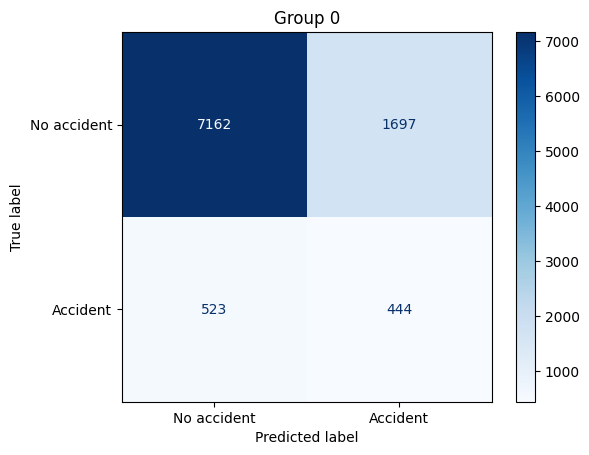

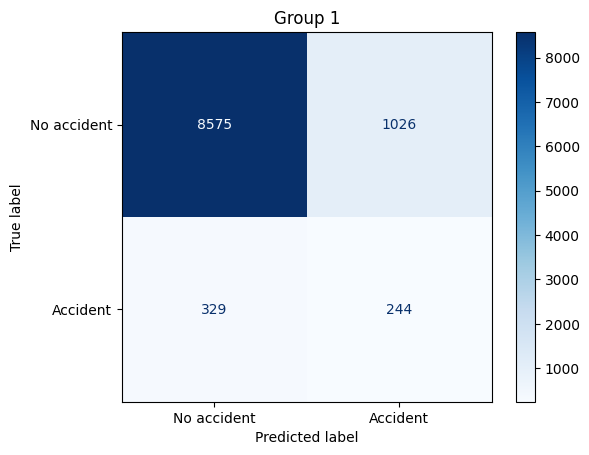

In [33]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(estimator, X, y_true, y_pred, display_labels=["No accident", "Accident"],
                          include_values=True, xticks_rotation='horizontal', values_format='',
                          normalize=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    return cm, disp.plot(include_values=include_values, cmap=cmap, xticks_rotation=xticks_rotation,
                     values_format=values_format)

# Function to evaluate the fairness of the model
def get_stats(X, y, model, group_one, preds):
        
    y_zero, preds_zero, X_zero = y[~(group_one)], preds[~(group_one)], X[~(group_one)]
    y_one, preds_one, X_one = y[group_one], preds[group_one], X[group_one]
    
    print("Total approvals:", preds.sum())
    print("Group 0:", preds_zero.sum(), "({}% of approvals)".format(round(preds_zero.sum()/sum(preds)*100, 2)))
    print("Group 1:", preds_one.sum(), "({}% of approvals)".format(round(preds_one.sum()/sum(preds)*100, 2)))
    
    print("\nOverall accuracy: {}%".format(round((preds==y).sum()/len(y)*100, 2)))
    print("Group 0: {}%".format(round((preds_zero==y_zero).sum()/len(y_zero)*100, 2)))
    print("Group 1: {}%".format(round((preds_one==y_one).sum()/len(y_one)*100, 2)))
    
    cm_zero, disp_zero = plot_confusion_matrix(model, X_zero, y_zero, preds_zero)
    disp_zero.ax_.set_title("Group 0")
    cm_one, disp_one = plot_confusion_matrix(model, X_one, y_one, preds_one)
    disp_one.ax_.set_title("Group 1")
    
    print("\nSensitivity / True positive rate:")
    print("Group 0: {}%".format(round(cm_zero[1,1] / cm_zero[1].sum()*100, 2)))
    print("Group 1: {}%".format(round(cm_one[1,1] / cm_one[1].sum()*100, 2)))
    
# Evaluate the model    
get_stats(X_test_transformed, y_test, model, X_test_transformed["SEX_1"]==1, y_pred_test)

In [34]:
model_results = {}
model_results["Aware"] = {
    "probabilities": y_probs_test,
    "model": model,
    "auc": auc_test,
    "f1": best_f1_score,
    "treshold": best_threshold,
    "prediction": y_pred_test,
    "accuracy": accuracy_test,
    "coefficients": coefficients
}

In [35]:
model_results["Aware"]

{'probabilities': array([0.51994613, 0.0477955 , 0.69290667, ..., 0.1906816 , 0.39822415,
        0.69421194]),
 'model': LogisticRegression(class_weight='balanced', random_state=42),
 'auc': 0.7661035619310267,
 'f1': 0.2794512225990989,
 'treshold': 0.64,
 'prediction': array([0, 0, 1, ..., 0, 0, 1]),
 'accuracy': 0.82125,
 'coefficients': array([ 0.12310791,  0.49145217,  0.08908161,  0.01380058, -0.0195824 ,
         0.05643196, -0.23868614, -0.0313428 , -0.26176697,  0.16745258,
        -2.18166382,  0.27452255,  0.44760407, -0.11772382, -0.32873875,
        -1.41063165, -0.25276977, -0.01873339, -1.29583091,  0.598698  ,
        -1.51270121,  0.63476588, -0.01624405, -0.10646302,  1.06431667,
         0.55316835, -0.24778859, -0.9512009 ,  0.02358752, -0.27378085,
         0.00368298,  1.54539624,  0.44336145, -0.34854138, -0.16078442,
        -0.1773796 ,  1.5698525 ,  0.64695013,  0.09395741,  0.07874214,
         0.6318182 ,  0.21985294,  0.08445047, -0.20492466,  1.42588685,


# UNAWARE MODEL

In [36]:
# Create new dataset with gender removed
X_train_unaware = X_train_transformed.drop(["SEX_1"],axis=1)
X_test_unaware = X_test_transformed.drop(["SEX_1"],axis=1)
# Train the logistic regression model
model_unaware = LogisticRegression(class_weight='balanced', random_state = 42)
model_unaware.fit(X_train_unaware, y_train)
probs_train_unaware = model_unaware.predict_proba(X_train_unaware)[:,1]

C:\Users\achot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Find the threshold that maximizes F1 score
best_f1_score_unaware = 0
best_threshold_unaware = 0

for threshold in thresholds:
    y_pred_test_unaware = (probs_train_unaware > threshold).astype(int)
    current_f1_score = f1_score(y_train, y_pred_test_unaware)
    
    if current_f1_score > best_f1_score:
        best_f1_score_unaware = current_f1_score
        best_threshold_unaware = threshold

print("Best F1 Score:", best_f1_score_unaware)
print("Best Threshold:", best_threshold_unaware)

Best F1 Score: 0.2795325815175792
Best Threshold: 0.64


In [38]:
probs_test_unaware = model_unaware.predict_proba(X_test_unaware)[:,1]

y_pred_test = (probs_test_unaware > best_threshold_unaware).astype('int')

# Evaluate the model op de test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy op test set met treshold {best_threshold_unaware} : {accuracy_test}")
# We kunnen model evalueren door de AUC te berkekenen op de test set
auc_test = roc_auc_score(y_test, probs_test_unaware)
print(f"AUC op test set: {auc_test}")

Accuracy op test set met treshold 0.64 : 0.8225
AUC op test set: 0.7654602088052791


Total approvals: 3376
Group 0: 2007 (59.45% of approvals)
Group 1: 1369 (40.55% of approvals)

Overall accuracy: 82.25%
Group 0: 78.36%
Group 1: 86.0%

Sensitivity / True positive rate:
Group 0: 43.85%
Group 1: 45.2%


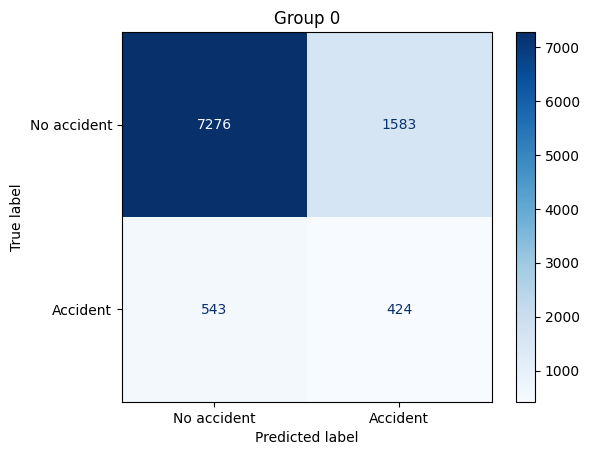

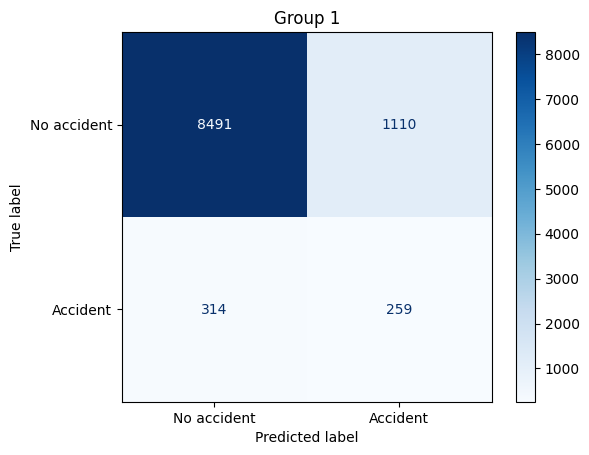

In [39]:
# Evaluate the model
pred_test_unaware = probs_test_unaware > best_threshold_unaware
get_stats(X_test_unaware, y_test, model_unaware, X_test_transformed["SEX_1"]==1, pred_test_unaware)

In [40]:
coefficients = model_unaware.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': X_train_unaware.columns, 'Coefficient': coefficients})

feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
sorted_feature_importance = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

sorted_feature_importance.head()

,Feature,Coefficient,AbsoluteCoefficient
9,TYPE_VEHICLE_Motor-cycle,-2.226431,2.226431
67,MAKE_WHEEL LOADER,-1.643421,1.643421
30,MAKE_DAF,1.594238,1.594238
35,MAKE_FORCE,1.586993,1.586993
19,MAKE_ASTRA,-1.544627,1.544627


In [41]:
print(logit_pvalue(model_unaware, X_test_unaware))

[5.36426575e-01 3.42487819e-04 0.00000000e+00 3.26955140e-05
 1.79356220e-01 4.83757319e-01 1.87224662e-02 9.60365477e-01
 8.77231965e-01 4.38064051e-01 4.62208005e-04 3.30417569e-01
 3.08044594e-01 6.82915200e-01 3.44177184e-01 2.49001623e-02
 6.49652179e-01 9.59977029e-01 2.68044717e-01 5.94102011e-01
 1.27984420e-01 4.01245149e-01 9.97646606e-01 9.14684162e-01
 3.31136852e-01 5.72502201e-01 7.88383995e-01 3.20552800e-01
 9.98105082e-01 8.03990660e-01 9.87319524e-01 1.15196094e-01
 6.62153653e-01 7.62777604e-01 8.67493574e-01 8.49422305e-01
 4.11671049e-02 5.17559604e-01 9.44724977e-01 8.46311567e-01
 5.29100215e-01 8.40549467e-01 9.68939415e-01 8.18673986e-01
 1.87446125e-01 7.02016295e-01 6.60327562e-01 3.43908316e-01
 2.64348696e-01 3.78610285e-01 7.27319240e-01 7.08272792e-01
 7.18373403e-01 7.35793273e-01 8.46734985e-01 6.60416999e-01
 2.36724341e-01 5.32686219e-01 5.53842430e-01 7.03225373e-01
 8.55147485e-01 7.63192795e-01 5.83220229e-01 5.42197909e-01
 6.85021102e-01 8.798740

In [42]:
import pandas as pd

p_values = logit_pvalue(model_unaware, X_test_unaware)

feature_names = ['intercept'] + list(X_train_unaware.columns)
p_values_df = pd.DataFrame({'Feature': feature_names, 'P-value': p_values})

print(p_values_df)

                                   Feature   P-value
0                                intercept  0.536427
1                            INSURED_VALUE  0.000342
2                                  PREMIUM  0.000000
3                                PROD_YEAR  0.000033
4                                SEATS_NUM  0.179356
5                        CARRYING_CAPACITY  0.483757
6                                  CCM_TON  0.018722
7                           INSR_TYPE_1202  0.960365
8                           INSR_TYPE_1204  0.877232
9                         TYPE_VEHICLE_Bus  0.438064
10                TYPE_VEHICLE_Motor-cycle  0.000462
11                    TYPE_VEHICLE_Pick-up  0.330418
12       TYPE_VEHICLE_Special construction  0.308045
13            TYPE_VEHICLE_Station Wagones  0.682915
14                     TYPE_VEHICLE_Tanker  0.344177
15                    TYPE_VEHICLE_Tractor  0.024900
16  TYPE_VEHICLE_Trailers and semitrailers  0.649652
17                      TYPE_VEHICLE_Truck  0.

In [43]:
pred_test_unaware = pred_test_unaware.astype(int)

model_results["Unaware"] = {
    "probabilities": probs_test_unaware,
    "model": model_unaware,
    "auc": auc_test,
    "f1": best_f1_score_unaware,
    "treshold": best_threshold_unaware,
    "prediction": pred_test_unaware,
    "accuracy": accuracy_test,
    "coefficients": coefficients
}

In [44]:
model_results["Unaware"]

{'probabilities': array([0.5144913 , 0.0483009 , 0.68115777, ..., 0.19341959, 0.4035214 ,
        0.69665138]),
 'model': LogisticRegression(class_weight='balanced', random_state=42),
 'auc': 0.7654602088052791,
 'f1': 0.2795325815175792,
 'treshold': 0.64,
 'prediction': array([0, 0, 1, ..., 0, 0, 1]),
 'accuracy': 0.8225,
 'coefficients': array([ 0.11642996,  0.49219633,  0.09381897,  0.03838948, -0.01380297,
         0.06412765,  0.01026641, -0.23670664,  0.14784239, -2.22643135,
         0.2976999 ,  0.46491554, -0.09198128, -0.32800947, -1.39217311,
        -0.23522392, -0.01554151, -1.33570574,  0.58260474, -1.54462686,
         0.66573181,  0.00225108, -0.11202218,  1.08683987,  0.55619596,
        -0.29925559, -1.03095051, -0.00263261, -0.26751598, -0.01582158,
         1.59423845,  0.45465145, -0.3516575 , -0.16970403, -0.18767904,
         1.58699276,  0.63961551,  0.07194461,  0.2026641 ,  0.62726976,
         0.21631669,  0.03814039, -0.22564073,  1.49110355,  0.38207539,
 

In [45]:
model_results["Aware"]["auc"]

0.7661035619310267

In [46]:
model_results["Unaware"]["auc"]

0.7654602088052791

# CORR REMOVER MODEL

In [47]:
X_cr_with_sex = X_cr
X_cr = X_cr.drop("SEX_1", axis=1)

In [48]:
# train test split
X_cr_train, X_cr_test, y_train, y_test = train_test_split(X_cr, y, test_size=0.2, random_state=42)
print(f"Shape of X_train {X_cr_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of X_test {X_cr_test.shape}")
print(f"Shape of y_test {y_test.shape}")

# numerieke features
numerical_columns = ["INSURED_VALUE","PREMIUM","PROD_YEAR","SEATS_NUM","CARRYING_CAPACITY","CCM_TON"]
print(f"De numerieke kolommen zijn: {numerical_columns}")

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()

# Toepassen van transformers to the respective columns
X_cr_train_numerical = pd.DataFrame(numerical_transformer.fit_transform(X_cr_train[numerical_columns]), columns=numerical_columns)

print(f"X train: numericals zijn gescaled")

X_cr_train_categorical = X_cr_train.drop(columns=numerical_columns)
X_cr_train_categorical = X_cr_train_categorical.reset_index(drop=True)
# Concatenate the transformed features

X_cr_train_transformed = pd.concat([X_cr_train_numerical, X_cr_train_categorical],axis=1)
X_cr_train_transformed

# Toepassen van transformers to the respective columns
X_cr_test_numerical = pd.DataFrame(numerical_transformer.fit_transform(X_cr_test[numerical_columns]), columns=numerical_columns)
X_cr_test_numerical = X_cr_test_numerical.reset_index(drop=True)
print(f"X test: numericals zijn gescaled")

X_cr_test_categorical = X_cr_test.drop(columns=numerical_columns)
X_cr_test_categorical = X_cr_test_categorical.reset_index(drop=True)

# Concatenate the transformed features
X_cr_test_transformed = pd.concat([X_cr_test_numerical, X_cr_test_categorical],axis=1)
X_cr_test_transformed

y_train = y_train.reset_index()["CLAIM_PAID"] #reset index because the X variables were reset by doing the transformations
y_test = y_test.reset_index()["CLAIM_PAID"]

Shape of X_train (80000, 82)
Shape of y_train (80000,)
Shape of X_test (20000, 82)
Shape of y_test (20000,)
De numerieke kolommen zijn: ['INSURED_VALUE', 'PREMIUM', 'PROD_YEAR', 'SEATS_NUM', 'CARRYING_CAPACITY', 'CCM_TON']
X train: numericals zijn gescaled
X test: numericals zijn gescaled


In [49]:
# Train the logistic regression model
model = LogisticRegression(class_weight='balanced', random_state = 42)
model.fit(X_cr_train_transformed, y_train)

# Make predictions on the test set
# y_probs zijn "kansen" tussen 0 en 1
y_probs_train = model.predict_proba(X_cr_train_transformed)[:, 1] 

# als de kansen > 0.50 (standaard treshold), dan is de predictie 1
y_pred_train = model.predict(X_cr_train_transformed) #treshold on 0.50

C:\Users\achot\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# We kunnen model evalueren door de AUC te berkekenen op de train set
auc_train = roc_auc_score(y_train, y_probs_train)
print(f"AUC op train set: {auc_train}")

AUC op train set: 0.7675183435138724


In [51]:
y_probs_test = model.predict_proba(X_cr_test_transformed)[:, 1] 
auc_test = roc_auc_score(y_test, y_probs_test)
print(f"AUC op test set: {auc_test}")

AUC op test set: 0.7600173242250707


In [52]:
# We gaan de de treshold van 0.50 aanpassen zodat we de F1-score kunnen optimaliseren, hetgeen wenselijk is voor de verzekaar

# Define a range of thresholds to test
thresholds = [0.01 * i for i in range(1, 100)]

# Find the threshold that maximizes F1 score
best_f1_score = 0
best_threshold = 0

# voor alle tresholds
for threshold in thresholds:

    y_pred = (y_probs_train > threshold).astype(int)

    # f1 score berkenen door de t_train en y_pred te vergelijken
    current_f1_score = f1_score(y_train, y_pred)

    # als het beter is dan overwriten we de resultaten
    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_threshold = threshold
        # print(f"best_f1_score : {best_f1_score}")
        # print(f"best_threshold : {best_threshold}")

print("Best F1 Score:", best_f1_score)
print("Best Threshold:", best_threshold)


Best F1 Score: 0.2749044899971244
Best Threshold: 0.58


In [53]:

# Make predictions on the test set
# alleen de probabilities hier (tussen 0 en 1)
y_probs_test = model.predict_proba(X_cr_test_transformed)[:, 1] 


In [54]:

y_pred_test = (y_probs_test > best_threshold).astype('int')

# Evaluate the model op de test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy op test set met treshold {best_threshold} : {accuracy_test}")


Accuracy op test set met treshold 0.58 : 0.7813


In [55]:
coefficients = model.coef_[0]

feature_importance_df = pd.DataFrame({'Feature': X_cr_train_transformed.columns, 'Coefficient': coefficients})

feature_importance_df['AbsoluteCoefficient'] = feature_importance_df['Coefficient'].abs()
sorted_feature_importance = feature_importance_df.sort_values(by='AbsoluteCoefficient', ascending=False)

sorted_feature_importance

,Feature,Coefficient,AbsoluteCoefficient
68,MAKE_YAMAHA,-10.146308,10.146308
55,MAKE_ORAL,-4.573096,4.573096
9,TYPE_VEHICLE_Motor-cycle,-3.576495,3.576495
35,MAKE_FORCE,3.194768,3.194768
19,MAKE_ASTRA,-2.829393,2.829393
67,MAKE_WHEEL LOADER,-2.816224,2.816224
20,MAKE_BAJAJ,2.587740,2.587740
47,MAKE_MASSY FUREGUSON,-2.539901,2.539901
21,MAKE_BAJAJI,2.324904,2.324904
43,MAKE_JOHN DEER,2.212931,2.212931


In [56]:

print(logit_pvalue(model, X_cr_test_transformed))

[6.26011373e-01 1.40596208e-05 0.00000000e+00 1.00771393e-04
 4.72103382e-01 4.80920451e-01 6.23253206e-02 7.74597852e-01
 8.12690055e-01 2.23616756e-01 9.93067265e-04 2.13083267e-01
 2.38893453e-01 8.03699183e-01 2.27957101e-01 7.11559342e-03
 4.55520679e-01 9.70643312e-01 3.20144432e-01 6.26387710e-01
 1.44030723e-01 9.13069930e-02 1.26695404e-01 9.74785888e-01
 3.91325216e-01 7.39994689e-01 7.32040699e-01 4.26362692e-01
 9.78604876e-01 9.43598552e-01 9.28363671e-01 3.57283633e-01
 7.52479377e-01 9.17149690e-01 9.82680403e-01 9.37607482e-01
 3.67209894e-02 6.61189304e-01 9.29248776e-01 8.90692035e-01
 6.81404053e-01 8.91902688e-01 9.11052106e-01 9.70547548e-01
 2.65846349e-01 7.22823150e-01 9.49565593e-01 5.41914520e-01
 3.83045127e-01 5.61583377e-01 8.96859044e-01 8.72318691e-01
 7.36819486e-01 8.31324627e-01 8.82922869e-01 8.29153054e-01
 3.54960936e-02 7.20057935e-01 6.67378872e-01 8.06752469e-01
 9.03639598e-01 9.14422104e-01 4.35067311e-01 7.72593568e-01
 7.87899467e-01 8.857724

In [57]:
import pandas as pd

p_values = logit_pvalue(model, X_cr_test_transformed)

feature_names = ['intercept'] + list(X_cr_train.columns)
p_values_df = pd.DataFrame({'Feature': feature_names, 'P-value': p_values})

print(p_values_df)

                                   Feature   P-value
0                                intercept  0.626011
1                            INSURED_VALUE  0.000014
2                                  PREMIUM  0.000000
3                                PROD_YEAR  0.000101
4                                SEATS_NUM  0.472103
5                        CARRYING_CAPACITY  0.480920
6                                  CCM_TON  0.062325
7                           INSR_TYPE_1202  0.774598
8                           INSR_TYPE_1204  0.812690
9                         TYPE_VEHICLE_Bus  0.223617
10                TYPE_VEHICLE_Motor-cycle  0.000993
11                    TYPE_VEHICLE_Pick-up  0.213083
12       TYPE_VEHICLE_Special construction  0.238893
13            TYPE_VEHICLE_Station Wagones  0.803699
14                     TYPE_VEHICLE_Tanker  0.227957
15                    TYPE_VEHICLE_Tractor  0.007116
16  TYPE_VEHICLE_Trailers and semitrailers  0.455521
17                      TYPE_VEHICLE_Truck  0.

In [58]:
model_results["CorreRemover"] = {
    "probabilities": y_probs_test,
    "model": model,
    "auc": auc_test,
    "f1": best_f1_score,
    "treshold": best_threshold,
    "prediction": y_pred_test,
    "accuracy": accuracy_test,
    "coefficients": coefficients
}

In [59]:
X_cr_test

,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,INSR_TYPE_1202,INSR_TYPE_1204,TYPE_VEHICLE_Bus,TYPE_VEHICLE_Motor-cycle,...,USAGE_Fare Paying Passengers,USAGE_Fire fighting,USAGE_General Cartage,USAGE_Learnes,USAGE_Others,USAGE_Own Goods,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi
75721,7.801094e+04,2589.092864,2009.586195,2.216614,-257.662893,2434.839017,1.009459,-0.000052,0.024185,0.172276,...,0.182068,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671
80184,2.316657e+05,1272.221280,2012.431768,4.728738,255.583420,748.812003,0.990830,0.000051,-0.023444,0.833003,...,0.823511,0.000060,-0.129964,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,-0.060751
19864,-2.389891e+05,10229.492864,2011.586195,97.216614,-164.662893,8083.839017,1.009459,-0.000052,1.024185,0.172276,...,1.182068,-0.000062,0.134072,0.001375,0.014816,-0.304944,-0.062371,-0.007426,-0.006186,0.062671
76699,1.474811e+06,10698.152864,2012.586195,2.216614,-256.662893,1927.839017,1.009459,-0.000052,0.024185,0.172276,...,0.182068,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671
92991,2.316657e+05,1162.221280,2014.431768,2.728738,255.583420,728.812003,0.990830,0.000051,-0.023444,0.833003,...,-0.176489,0.000060,-0.129964,-0.001333,-0.014362,0.295600,0.060459,1.007198,0.005996,-0.060751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,2.316657e+05,5439.021280,2005.431768,3.728738,255.583420,4882.812003,0.990830,0.000051,-0.023444,-0.166997,...,-0.176489,0.000060,0.870036,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,-0.060751
29313,9.568872e+05,26058.472864,2008.586195,-0.783386,-253.662893,3602.839017,1.009459,-0.000052,0.024185,0.172276,...,0.182068,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671
37862,2.316657e+05,1339.621280,2009.431768,5.728738,259.583420,1047.812003,0.990830,0.000051,-0.023444,0.833003,...,-0.176489,0.000060,-0.129964,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,0.939249
53421,2.316657e+05,5445.921280,2012.431768,3.728738,255.583420,8774.812003,0.990830,0.000051,-0.023444,-0.166997,...,-0.176489,0.000060,0.870036,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,-0.060751


In [60]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: CLAIM_PAID, Length: 20000, dtype: int32

In [61]:
X_test

,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,SEX_1,INSR_TYPE_1202,INSR_TYPE_1204,TYPE_VEHICLE_Bus,...,USAGE_Fare Paying Passengers,USAGE_Fire fighting,USAGE_General Cartage,USAGE_Learnes,USAGE_Others,USAGE_Own Goods,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi
75721,317000.00,3542.84,2009.0,4.0,6.0,3001.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
80184,0.00,347.70,2013.0,3.0,0.0,200.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19864,0.00,11183.24,2011.0,99.0,99.0,8650.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76699,1713799.96,11651.90,2012.0,4.0,7.0,2494.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
92991,0.00,237.70,2015.0,1.0,0.0,180.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,0.00,4514.50,2006.0,2.0,0.0,4334.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29313,1195876.28,27012.22,2008.0,1.0,10.0,4169.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37862,0.00,415.10,2010.0,4.0,4.0,499.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53421,0.00,4521.40,2013.0,2.0,0.0,8226.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_cr_test

,INSURED_VALUE,PREMIUM,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,CCM_TON,INSR_TYPE_1202,INSR_TYPE_1204,TYPE_VEHICLE_Bus,TYPE_VEHICLE_Motor-cycle,...,USAGE_Fare Paying Passengers,USAGE_Fire fighting,USAGE_General Cartage,USAGE_Learnes,USAGE_Others,USAGE_Own Goods,USAGE_Own service,USAGE_Private,USAGE_Special Construction,USAGE_Taxi
75721,7.801094e+04,2589.092864,2009.586195,2.216614,-257.662893,2434.839017,1.009459,-0.000052,0.024185,0.172276,...,0.182068,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671
80184,2.316657e+05,1272.221280,2012.431768,4.728738,255.583420,748.812003,0.990830,0.000051,-0.023444,0.833003,...,0.823511,0.000060,-0.129964,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,-0.060751
19864,-2.389891e+05,10229.492864,2011.586195,97.216614,-164.662893,8083.839017,1.009459,-0.000052,1.024185,0.172276,...,1.182068,-0.000062,0.134072,0.001375,0.014816,-0.304944,-0.062371,-0.007426,-0.006186,0.062671
76699,1.474811e+06,10698.152864,2012.586195,2.216614,-256.662893,1927.839017,1.009459,-0.000052,0.024185,0.172276,...,0.182068,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671
92991,2.316657e+05,1162.221280,2014.431768,2.728738,255.583420,728.812003,0.990830,0.000051,-0.023444,0.833003,...,-0.176489,0.000060,-0.129964,-0.001333,-0.014362,0.295600,0.060459,1.007198,0.005996,-0.060751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,2.316657e+05,5439.021280,2005.431768,3.728738,255.583420,4882.812003,0.990830,0.000051,-0.023444,-0.166997,...,-0.176489,0.000060,0.870036,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,-0.060751
29313,9.568872e+05,26058.472864,2008.586195,-0.783386,-253.662893,3602.839017,1.009459,-0.000052,0.024185,0.172276,...,0.182068,-0.000062,0.134072,0.001375,0.014816,0.695056,-0.062371,-0.007426,-0.006186,0.062671
37862,2.316657e+05,1339.621280,2009.431768,5.728738,259.583420,1047.812003,0.990830,0.000051,-0.023444,0.833003,...,-0.176489,0.000060,-0.129964,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,0.939249
53421,2.316657e+05,5445.921280,2012.431768,3.728738,255.583420,8774.812003,0.990830,0.000051,-0.023444,-0.166997,...,-0.176489,0.000060,0.870036,-0.001333,-0.014362,0.295600,0.060459,0.007198,0.005996,-0.060751


Total approvals: 4536
Group 0: 2430 (53.57% of approvals)
Group 1: 2106 (46.43% of approvals)

Overall accuracy: 78.13%
Group 0: 75.56%
Group 1: 80.61%

Sensitivity / True positive rate:
Group 0: 51.5%
Group 1: 61.61%


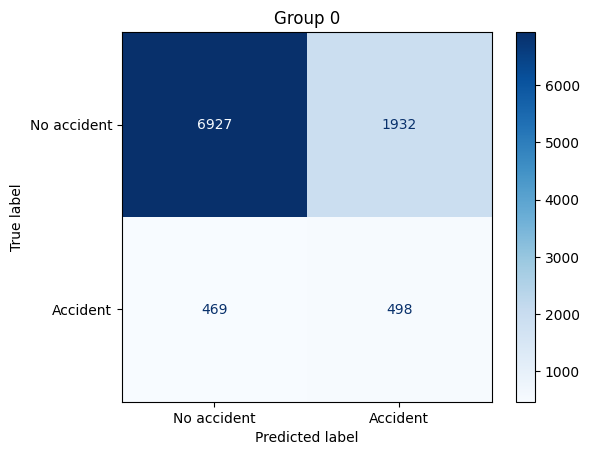

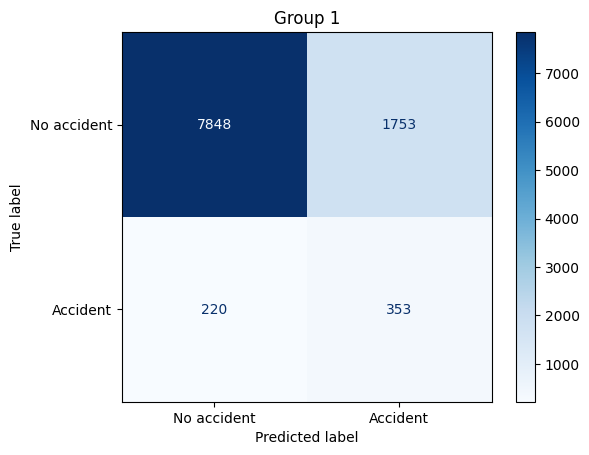

In [63]:
# In X_cr_test is er geen kolom meer voor geslacht
# we hebben die wel nodig voor deze matrixes te maken
# we kunnen de waarde nemen van de voorgaande modellen aangezien de indexes hetzelfde zijn voor X_test_transformed als X_cr_test
X_cr_test = X_cr_test.reset_index(drop=True)

get_stats(X_cr_test, y_test, model, X_test_transformed["SEX_1"]==1, y_pred_test)

## FAIRLEARN MITIGATIONS

In [64]:
X_test_transformed["SEX_1"]

0        0.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
19995    1.0
19996    0.0
19997    1.0
19998    1.0
19999    1.0
Name: SEX_1, Length: 20000, dtype: float64

In [65]:
model_results["CorreRemover"] = {
    "probabilities": y_probs_test,
    "model": model,
    "auc": auc_test,
    "f1": best_f1_score,
    "treshold": best_threshold,
    "prediction": y_pred_test,
    "accuracy": accuracy_test,
    "coefficients": coefficients
}

model_results["CorreRemover"]

{'probabilities': array([0.47622122, 0.12130845, 0.64912938, ..., 0.2354915 , 0.44933389,
        0.73485265]),
 'model': LogisticRegression(class_weight='balanced', random_state=42),
 'auc': 0.7600173242250707,
 'f1': 0.2749044899971244,
 'treshold': 0.58,
 'prediction': array([0, 0, 1, ..., 0, 0, 1]),
 'accuracy': 0.7813,
 'coefficients': array([  0.13793054,   0.46938855,   0.08836505,   0.02043258,
         -0.01403461,   0.05105192,   0.06010513,  -0.3739326 ,
          0.22767232,  -3.5764951 ,   0.34761081,   0.53271797,
         -0.05553158,  -0.39648654,  -2.02397797,  -0.38046821,
         -0.0104293 ,  -2.11817162,   0.95747653,  -2.82939313,
          2.58773966,   2.32490387,   0.06012801,   1.70098047,
          0.62076702,   0.62412607,   1.26671501,   0.05217019,
         -0.13608752,   0.16863666,   1.73529785,   0.5993382 ,
         -0.20545564,  -0.04098566,  -0.14657195,   3.19476809,
          0.82060367,   0.16861916,   0.26162639,   0.7703484 ,
          0.260762

In [66]:
# Voorspellingen moeten 0 of 1 zijn voor raiwidgets
model_results["Unaware"]["prediction"] = model_results["Unaware"]["prediction"].astype(int)

In [67]:
dashboard_all = {
    "Aware": model_results["Aware"]["prediction"],
    "Unaware": model_results["Unaware"]["prediction"],
    "CorreRemover": model_results["CorreRemover"]["prediction"],
}

In [ ]:
from raiwidgets import FairnessDashboard

FairnessDashboard(sensitive_features=X_test_transformed["SEX_1"], 
                  y_true=y_test.tolist(),
                  y_pred=dashboard_all,
                    locale='en'
)

In [ ]:

# A_test contains your sensitive features (e.g., age, binary gender)
# y_true contains ground truth labels
# y_pred contains prediction labels

FairnessDashboard(sensitive_features=X_test_transformed["SEX_1"],
                  y_true=y_test.tolist(),
                  y_pred=y_pred_test.tolist())

In [69]:
from fairlearn.preprocessing import CorrelationRemover


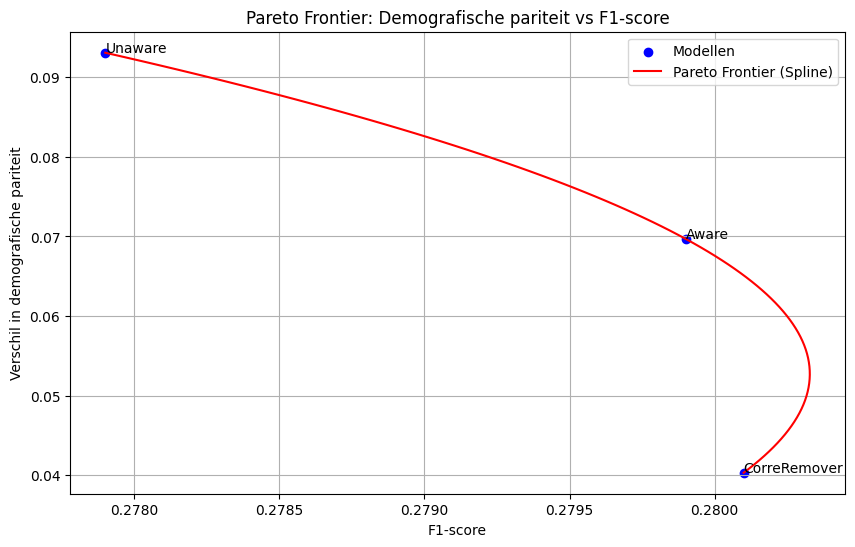

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Coördinaten van de modellen
coordinates = {
    "Aware": (0.2799, 0.0697),
    "Unaware": (0.2779, 0.0931),
    "CorreRemover": (0.2801, 0.0403)
}

ordered_coordinates = {
    "Unaware": coordinates["Unaware"],
    "Aware": coordinates["Aware"],
    "CorreRemover": coordinates["CorreRemover"]
}

#  F1-scores en het verschil in demografische pariteit
f1_scores = np.array([ordered_coordinates[model][0] for model in ordered_coordinates])
demog_parity_diff = np.array([ordered_coordinates[model][1] for model in ordered_coordinates])

# Plot van de Pareto-frontier
plt.figure(figsize=(10, 6))
plt.scatter(f1_scores, demog_parity_diff, color='blue', marker='o', label='Modellen')

tck, u = splprep([f1_scores, demog_parity_diff], k=2, s=0)
x_spline, y_spline = splev(np.linspace(0, 1, 100), tck)

plt.plot(x_spline, y_spline, color='red', label='Pareto Frontier (Spline)')

for model, (x, y) in ordered_coordinates.items():
    plt.text(x, y, model)

plt.xlabel('F1-score')
plt.ylabel('Verschil in demografische pariteit')

plt.title('Pareto Frontier: Demografische pariteit vs F1-score')

plt.legend()

plt.grid(True)
plt.show()


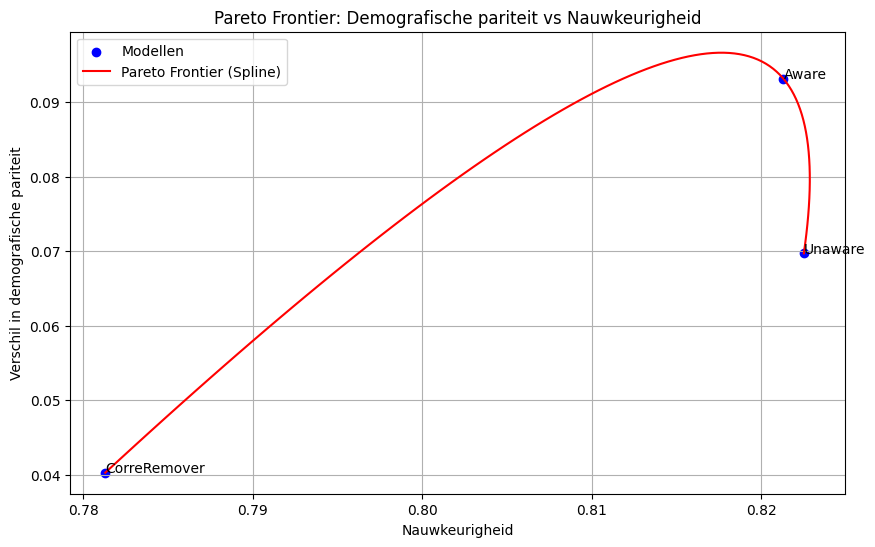

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

coordinates = {
    "Aware": (0.8213, 0.0931),
    "Unaware": (0.8225, 0.0697),
    "CorreRemover": (0.7813, 0.0403)
}

ordered_coordinates = {
    "CorreRemover": coordinates["CorreRemover"],
    "Aware": coordinates["Aware"],
    "Unaware": coordinates["Unaware"]
}

Nauwkeurigheid = np.array([ordered_coordinates[model][0] for model in ordered_coordinates])
demog_parity_diff = np.array([ordered_coordinates[model][1] for model in ordered_coordinates])

plt.figure(figsize=(10, 6))
plt.scatter(Nauwkeurigheid, demog_parity_diff, color='blue', marker='o', label='Modellen')

tck, u = splprep([Nauwkeurigheid, demog_parity_diff], k=2, s=0)
x_spline, y_spline = splev(np.linspace(0, 1, 100), tck)

plt.plot(x_spline, y_spline, color='red', label='Pareto Frontier (Spline)')

for model, (x, y) in ordered_coordinates.items():
    plt.text(x, y, model)

plt.xlabel('Nauwkeurigheid')
plt.ylabel('Verschil in demografische pariteit')

plt.title('Pareto Frontier: Demografische pariteit vs Nauwkeurigheid')

plt.legend()

plt.grid(True)
plt.show()
